---
# Clustering
---

## Project-Segmenting customers into clusters 

### Perform Customer Segmentation on the transactional data to build an efficient marketing model. This is a transactional data set that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a registered non-store online retail.

### Invoice No: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

### Description: Product (item) name. Nominal.

### Quantity: The quantities of each product (item) per transaction. Numeric.

### Invoice Date: Invoice Date and time. Numeric, the day and time when each transaction was generated.

### UnitPrice: Unit price. Numeric, Product price per unit in sterling.

### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

### Country: Country name. Nominal, the name of the country where each customer resides

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

### Loading the dataset

In [2]:
#Reading the dataset
data=pd.read_excel("Project 6-Segmenting customers into clusters-Dataset.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
#Checking the datatypes
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
#Checking the null values
data.isnull().sum()/len(data)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
#Dropping the null values of Customer id column
data=data.dropna(subset=['CustomerID'])

In [8]:
# percentage of missing values in each variable
data.isnull().sum()/len(data)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [9]:
#Changing the varible to string
data['InvoiceNo']=data['InvoiceNo'].astype(str)
data['StockCode']=data['StockCode'].astype(str)

In [10]:
#Extracting hour,month and weekday from invoiceDate column
data['InvoiceDate_month']=data['InvoiceDate'].dt.month
data['InvoiceDate_weekday']=data['InvoiceDate'].dt.weekday
data['InvoiceDate_hour']=data['InvoiceDate'].dt.hour

### Since the invoice no is containing cancelled order also so we will check the amount of cancelled orders if it is significant or not.

In [11]:
#Constructing groupby dataframe
temp=data.groupby(by=['CustomerID','InvoiceNo'],as_index=False)['InvoiceDate'].count()
no_of_products_per_group=temp.rename(columns={'InvoiceDate':'No of products'})

In [16]:
# Finding the cancelled orders and imputing 1 if it is cancelled otherwise 0.
no_of_products_per_group['order_cancelled'] = no_of_products_per_group['InvoiceNo'].apply(lambda x:int('C' in x))

# Percent cancelled orders.
len(no_of_products_per_group[no_of_products_per_group['order_cancelled']==1])/len(no_of_products_per_group)*100

16.466876971608833

In [ ]:
no_of_products_per_group

In [17]:
#Calculating the percentage of cancelling order
len(no_of_products_per_group[no_of_products_per_group['order_cancelled']==1])/len(no_of_products_per_group)*100

16.466876971608833

**16%** of the orders are cancelled which is significant in number.

Let's take the cancelled orders in account to the main datframe. 

In [18]:
# Applying lambda function over the whole dataset
data['order_cancelled'] = data['InvoiceNo'].apply(lambda x:int('C' in x))

In [19]:
#Let's drop the invoice date column
data=data.drop(['InvoiceDate'],axis=1)

In [20]:
data.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
UnitPrice              float64
CustomerID             float64
Country                 object
InvoiceDate_month        int64
InvoiceDate_weekday      int64
InvoiceDate_hour         int64
order_cancelled          int64
dtype: object

## Label encoding of string variables

In [21]:
#Importing label encoder for converting categorical to numerical variable
from sklearn.preprocessing import LabelEncoder

In [23]:
# Transforming each feature
le = LabelEncoder()
label_InvoiceNo = le.fit_transform(data['InvoiceNo'])
label_StockCode = le.fit_transform(data['StockCode'])
label_Description = le.fit_transform(data['Description'])
label_Country = le.fit_transform(data['Country'])

In [24]:
# Storing the generated label in their respective columns
data['InvoiceNo'] = label_InvoiceNo
data['StockCode'] = label_StockCode
data['Description'] = label_Description
data['Country'] = label_Country

### Scaling the data

In [25]:
# Importing Standard Scaler and fitting the scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [26]:
#Transforming the scaled data into dataframe
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05
mean,-2.733182e-13,-1.943826e-15,-7.891660e-16,2.075071e-15,-3.085516e-16,-9.686600e-16,-4.533509e-15,4.928740e-13,-5.571582e-15,-5.450337e-14,-3.685395e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.792216e+00,-1.863931e+00,-1.858922e+00,-3.257311e+02,-4.992379e-02,-1.716675e+00,-4.871627e+00,-1.932163e+00,-1.356156e+00,-2.948631e+00,-1.495949e-01
25%,-8.808803e-01,-7.538118e-01,-8.095044e-01,-4.045671e-02,-3.189019e-02,-7.788819e-01,3.223641e-01,-7.622096e-01,-8.358387e-01,-7.603986e-01,-1.495949e-01
50%,6.467571e-02,-6.072778e-02,-3.460664e-02,-2.839365e-02,-2.179138e-02,-7.918459e-02,3.223641e-01,1.152558e-01,-3.155215e-01,1.148945e-01,-1.495949e-01
75%,8.465154e-01,6.311714e-01,8.449574e-01,-2.465022e-04,4.176999e-03,8.772823e-01,3.223641e-01,9.927212e-01,7.251129e-01,5.525410e-01,-1.495949e-01
max,2.204154e+00,2.499536e+00,1.717176e+00,3.256341e+02,5.621654e+02,1.750299e+00,4.707639e-01,1.285210e+00,1.765747e+00,3.178420e+00,6.684718e+00


### K means clustering

In [28]:
#Appending the result of inertia in a blank list  names SSE, after fitting the scaled data into kmeans for each number 
# of clusters
SSE_scaled=[]
for cluster in range(1,15):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

In [29]:
#creating a DataFrame
frame_scaled=pd.DataFrame({'Cluster':range(1,15),'SSE':SSE_scaled})

In [30]:
frame_scaled

,Cluster,SSE
0,1,4.475119e+06
1,2,3.965139e+06
2,3,3.549758e+06
3,4,3.159020e+06
4,5,2.981496e+06
5,6,2.672319e+06
6,7,2.504380e+06
7,8,2.338402e+06
8,9,2.159915e+06
9,10,2.045762e+06


### Elbow curve for clusters

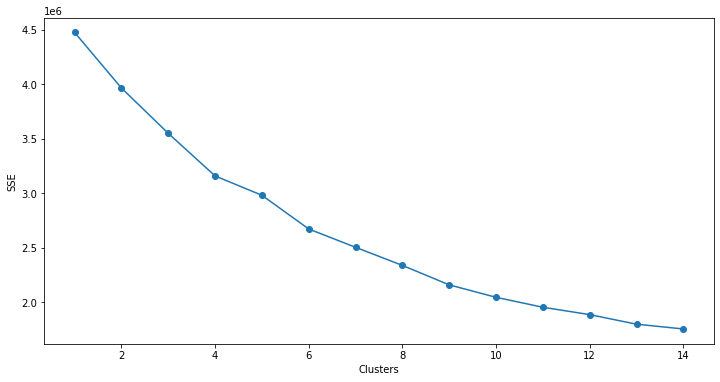

In [31]:
#Plotting the elbow curve
plt.figure(figsize=(12,6))
plt.plot(frame_scaled['Cluster'],frame_scaled['SSE'],marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

*From the above graph we observe that the optimum value of number of cluster is 5.* 

In [33]:
#Fitting the data and predicting the clusters
kmeans=KMeans(n_jobs=-1,n_clusters=5)
kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)

In [34]:
#Predicted clusters
pred

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
#Creaing dataframe of scaled data
frame=pd.DataFrame(data_scaled)

In [37]:
#creating a cilumn name cluster and putting the predicted values of cluster
frame['cluster']=pred

In [39]:
#No of data points allocated to each cluster
frame['cluster'].value_counts()

1    223475
3    139429
0     35020
4      8904
2         1
Name: cluster, dtype: int64

In [40]:
#Checking the dataframe with clusters
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,cluster
0,-1.792216,1.985351,1.552832,-0.024373,-0.013135,1.49528,0.322364,1.28521,-0.315521,-2.073338,-0.149595,1
1,-1.792216,1.274496,1.560177,-0.024373,-0.001017,1.49528,0.322364,1.28521,-0.315521,-2.073338,-0.149595,1
2,-1.792216,1.518556,-1.068416,-0.016331,-0.010250,1.49528,0.322364,1.28521,-0.315521,-2.073338,-0.149595,1
3,-1.792216,1.456948,-0.194360,-0.024373,-0.001017,1.49528,0.322364,1.28521,-0.315521,-2.073338,-0.149595,1
4,-1.792216,1.455764,0.689794,-0.024373,-0.001017,1.49528,0.322364,1.28521,-0.315521,-2.073338,-0.149595,1


**After we predicted the clusters for each of the data elements, above dataframe shows that out of the 5 clusters, which data item will belong to which cluster.**